In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split ,  RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import json
import joblib


In [26]:
try:
    BASE_DIR = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # Fallback for Jupyter or interactive mode
    BASE_DIR = os.getcwd()

file_path = os.path.join(BASE_DIR, "Data", "covtype.csv")
df = pd.read_csv(file_path)


In [27]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [29]:
df.shape


(581012, 55)

In [30]:
df.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

In [31]:
df.isna().sum()


Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


# Data Splitting

In [32]:
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# **Modeling Without Hyperparameters Tuning**


# Decision Tree

In [33]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classifier Report:")
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.9388656058793663
Decision Tree Classifier Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94     42368
           2       0.95      0.95      0.95     56661
           3       0.93      0.93      0.93      7151
           4       0.84      0.85      0.84       549
           5       0.84      0.84      0.84      1899
           6       0.88      0.87      0.88      3473
           7       0.95      0.94      0.95      4102

    accuracy                           0.94    116203
   macro avg       0.90      0.90      0.90    116203
weighted avg       0.94      0.94      0.94    116203



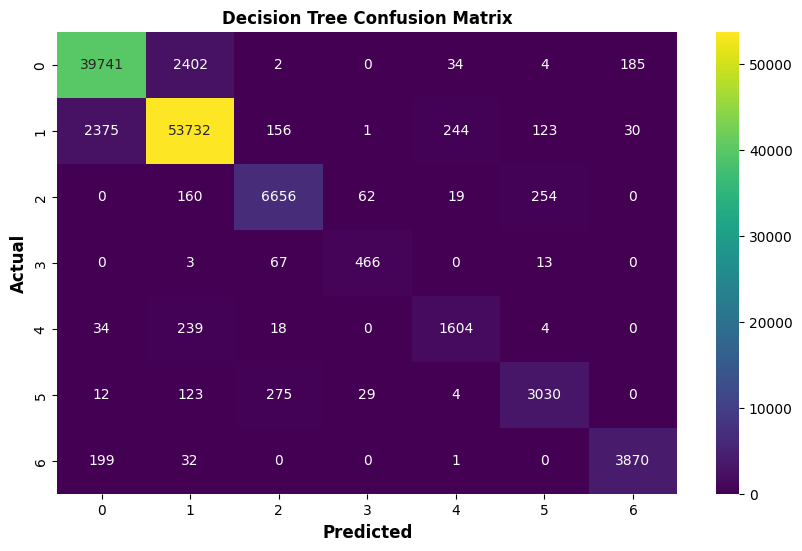

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Decision Tree Confusion Matrix', fontsize=12, fontweight='bold')
plt.show()

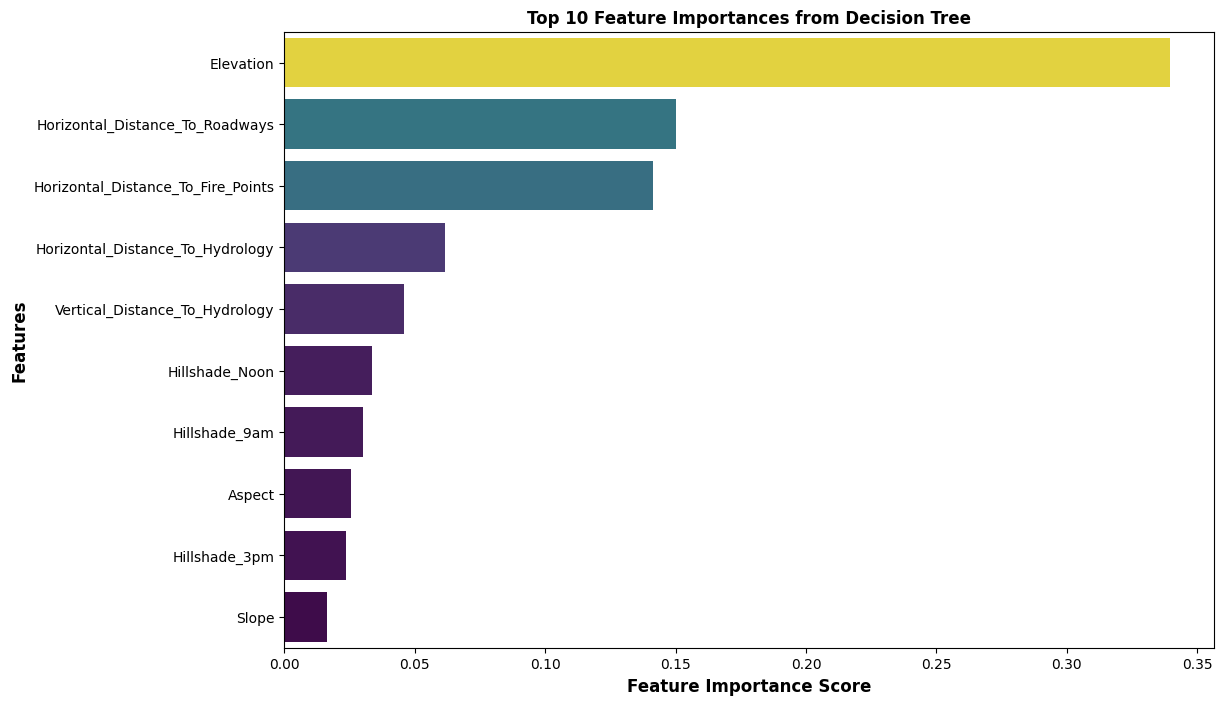

In [35]:
important_features_dt = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=important_features_dt[:10], y=important_features_dt.index[:10], palette='viridis',hue=important_features_dt[:10],legend=False)
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 10 Feature Importances from Decision Tree', fontsize=12, fontweight='bold')
plt.show()

# **Random Forest Model**

Accuracy: 0.9533316695782381
Random Forest Classifier Report:
              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42368
           2       0.95      0.97      0.96     56661
           3       0.94      0.96      0.95      7151
           4       0.92      0.86      0.89       549
           5       0.95      0.77      0.85      1899
           6       0.93      0.89      0.91      3473
           7       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203



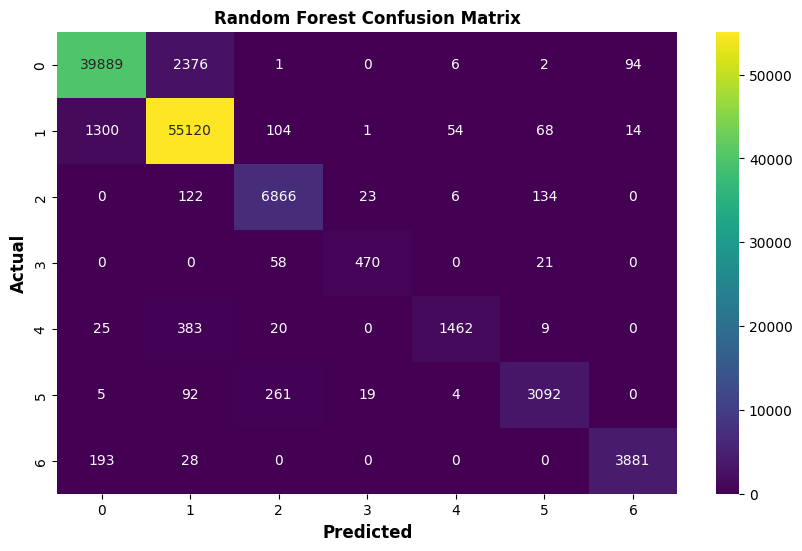

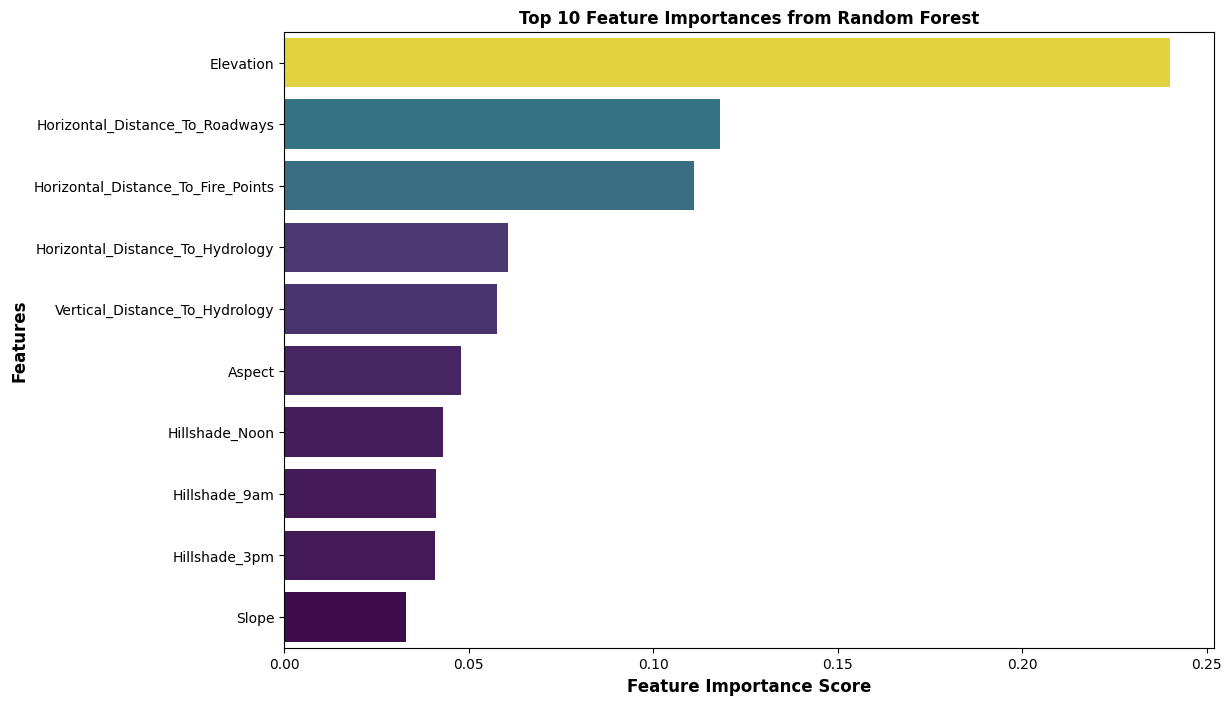

In [36]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier Report:")   
print(classification_report(y_test, y_pred_rf))
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('Random Forest Confusion Matrix', fontsize=12, fontweight='bold')
plt.show()
important_features_rf = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=important_features_rf[:10], y=important_features_rf.index[:10], palette='viridis',hue=important_features_rf[:10],legend=False)
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 10 Feature Importances from Random Forest', fontsize=12, fontweight='bold')
plt.show()



# **XGBoost Model**

In [37]:
y_train_xbg = y_train - 1
y_test_xbg = y_test - 1
print(np.unique(y_train_xbg)) 


[0 1 2 3 4 5 6]


[1 2 3 4 5 6 7]
Accuracy: 0.8696074972246843
XGBoost Classifier Report:
              precision    recall  f1-score   support

           1       0.86      0.84      0.85     42368
           2       0.87      0.90      0.88     56661
           3       0.89      0.91      0.90      7151
           4       0.88      0.86      0.87       549
           5       0.89      0.61      0.72      1899
           6       0.85      0.80      0.82      3473
           7       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203



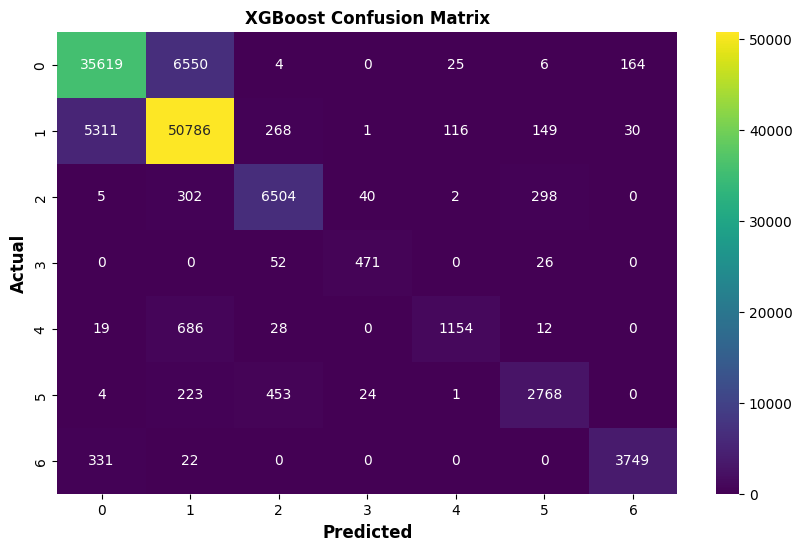

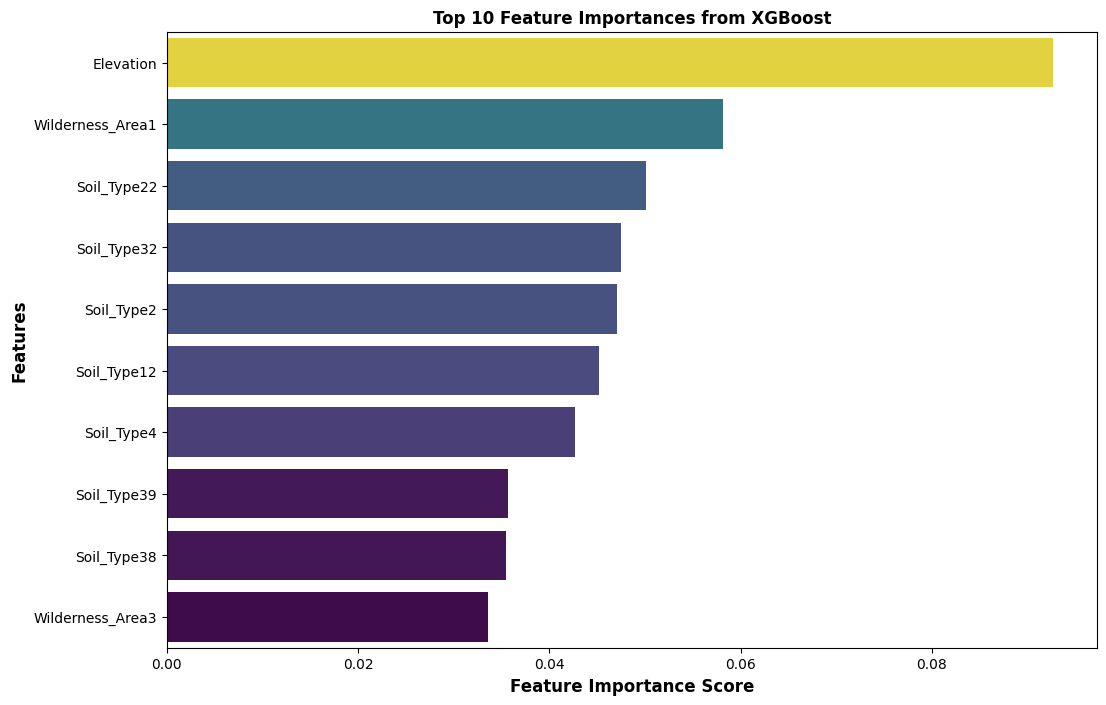

In [38]:
xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train_xbg)
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb = y_pred_xgb + 1
print(np.unique(y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("XGBoost Classifier Report:")
print(classification_report(y_test, y_pred_xgb))
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted', fontsize=12, fontweight='bold')
plt.ylabel('Actual', fontsize=12, fontweight='bold')
plt.title('XGBoost Confusion Matrix', fontsize=12, fontweight='bold')
plt.show()
important_features_xgb = pd.Series(xgb.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=important_features_xgb[:10], y=important_features_xgb.index[:10], palette='viridis',hue=important_features_xgb[:10],legend=False)
plt.xlabel('Feature Importance Score', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title('Top 10 Feature Importances from XGBoost', fontsize=12, fontweight='bold')
plt.show()


# **Hyper Parameter Tuning**

In [39]:
X_small, _, y_small, _ = train_test_split(X_train, y_train,train_size=45000,stratify=y_train,random_state=42)
dt_small = DecisionTreeClassifier(random_state=42)
rf_small = RandomForestClassifier(random_state=42)
xgb_small = XGBClassifier(random_state=42)

# Hyperparameter Tuning (Decision Tree)

In [40]:
param_grid_dt = {
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy'],
}

In [ ]:
dt_random = RandomizedSearchCV(estimator=dt_small, param_distributions=param_grid_dt, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)
dt_random.fit(X_small, y_small)
print("Best Hyperparameters for Decision Tree:", dt_random.best_params_)
best_dt = dt_random.best_estimator_
y_pred_best_dt = best_dt.predict(X_test)
print("Best Params:", dt_random.best_params_)
print("Best CV Score:", dt_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_dt))

with open("best_dt_params.json", "w") as f:
    json.dump(dt_random.best_params_, f, indent=4)
print("💾 Best Decision Tree parameters saved to 'best_dt_params.json'")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Hyperparameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
Best Params: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 20, 'criterion': 'gini'}
Best CV Score: 0.8053555555555555
Test Accuracy: 0.8178016058105212
💾 Best Decision Tree parameters saved to 'best_dt_params.json'
💾 Best Decision Tree model saved as 'best_decision_tree_model.pkl'


# Hyperparameter Tuning (Random Forest)

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
}

rf_random = RandomizedSearchCV(estimator=rf_small, param_distributions=param_grid_rf, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_small, y_small)
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
print("Best Params:", rf_random.best_params_)
print("Best CV Score:", rf_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_rf))
with open("best_rf_params.json", "w") as f:
    json.dump(rf_random.best_params_, f, indent=4)
print("💾 Best Random Forest parameters saved to 'best_rf_params.json'")



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Best CV Score: 0.8756444444444446
Test Accuracy: 0.8928254864332246
💾 Best Random Forest parameters saved to 'best_rf_params.json'
💾 Best Random Forest model saved as 'best_random_forest_model.pkl'


# Hyperparameter Tuning (XGBoost)


In [45]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}


In [ ]:
xbg_random = RandomizedSearchCV(estimator=xgb_small, param_distributions=param_grid_xgb, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
xbg_random.fit(X_small, y_small-1)
best_xgb = xbg_random.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)
print("Best Params:", xbg_random.best_params_)
print("Best CV Score:", xbg_random.best_score_)
print("Test Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
with open("best_xgb_params.json", "w") as f:
    json.dump(xbg_random.best_params_, f, indent=4)
print("💾 Best XGBoost parameters saved to 'best_xgb_params.json'")



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Params: {'subsample': 0.8, 'n_estimators': 300, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 1.0}
Best CV Score: 0.8845555555555557
Test Accuracy: 0.04110909356901285
💾 Best XGBoost parameters saved to 'best_xgb_params.json'
💾 Best XGBoost model saved as 'best_xgboost_model.pkl'
